<a href="https://colab.research.google.com/github/Angshuman-nits/ML_Projects/blob/main/EmployeeLeftRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
df= pd.read_csv('/content/gdrive/MyDrive/Employee_Attrition.csv')

In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
df.shape

(14999, 10)

In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [14]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [17]:
#to check for duplicate values
df1= df.drop_duplicates()

In [18]:
df1.shape

(11991, 10)

In [19]:
#to check for null values
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [20]:
#hence no null values are present

In [21]:
#0 means stay in company and 1 means leave the company

**DATA EXPLORATION AND VISUALIZATION**

In [22]:
df1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

<Axes: ylabel='count'>

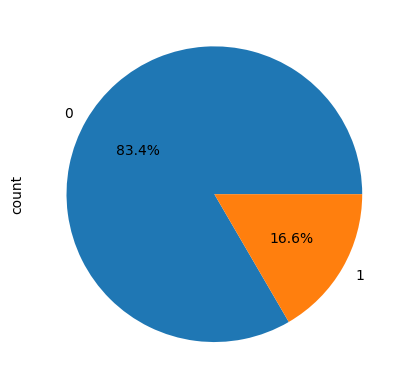

In [23]:
df1['left'].value_counts().plot(kind='pie',autopct='%1.1f%%') #as a pie chart repr

<Axes: xlabel='left'>

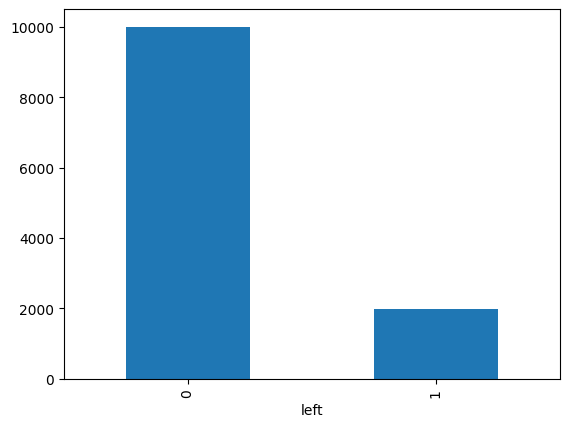

In [24]:
df1['left'].value_counts().plot(kind='bar')

In [25]:
#to find the impact of salary on the employee retention we'll use crosstab

<Axes: xlabel='salary'>

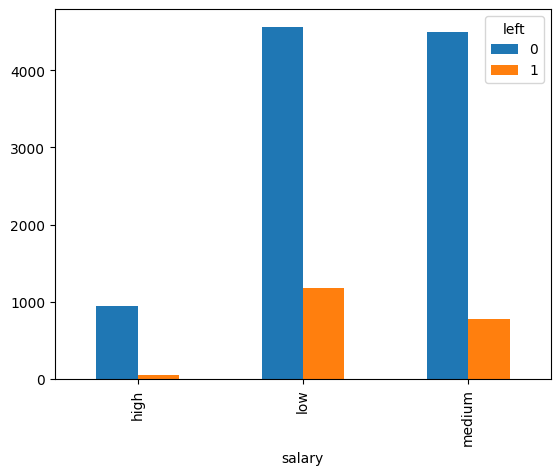

In [26]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar')

<Axes: xlabel='Department'>

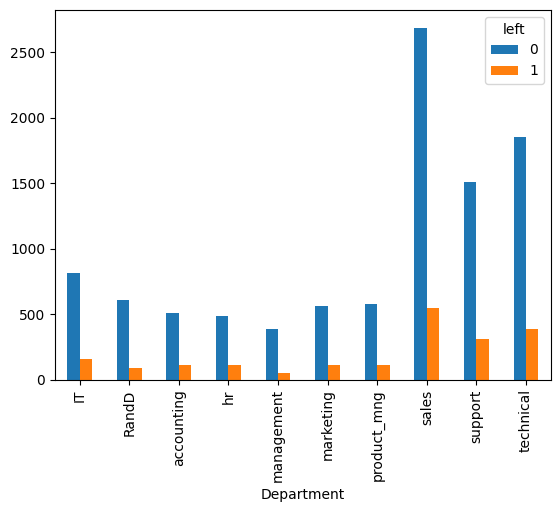

In [27]:
#to find the impact of department on the employee retention we'll use crosstab
pd.crosstab(df1.Department,df1.left).plot(kind='bar')

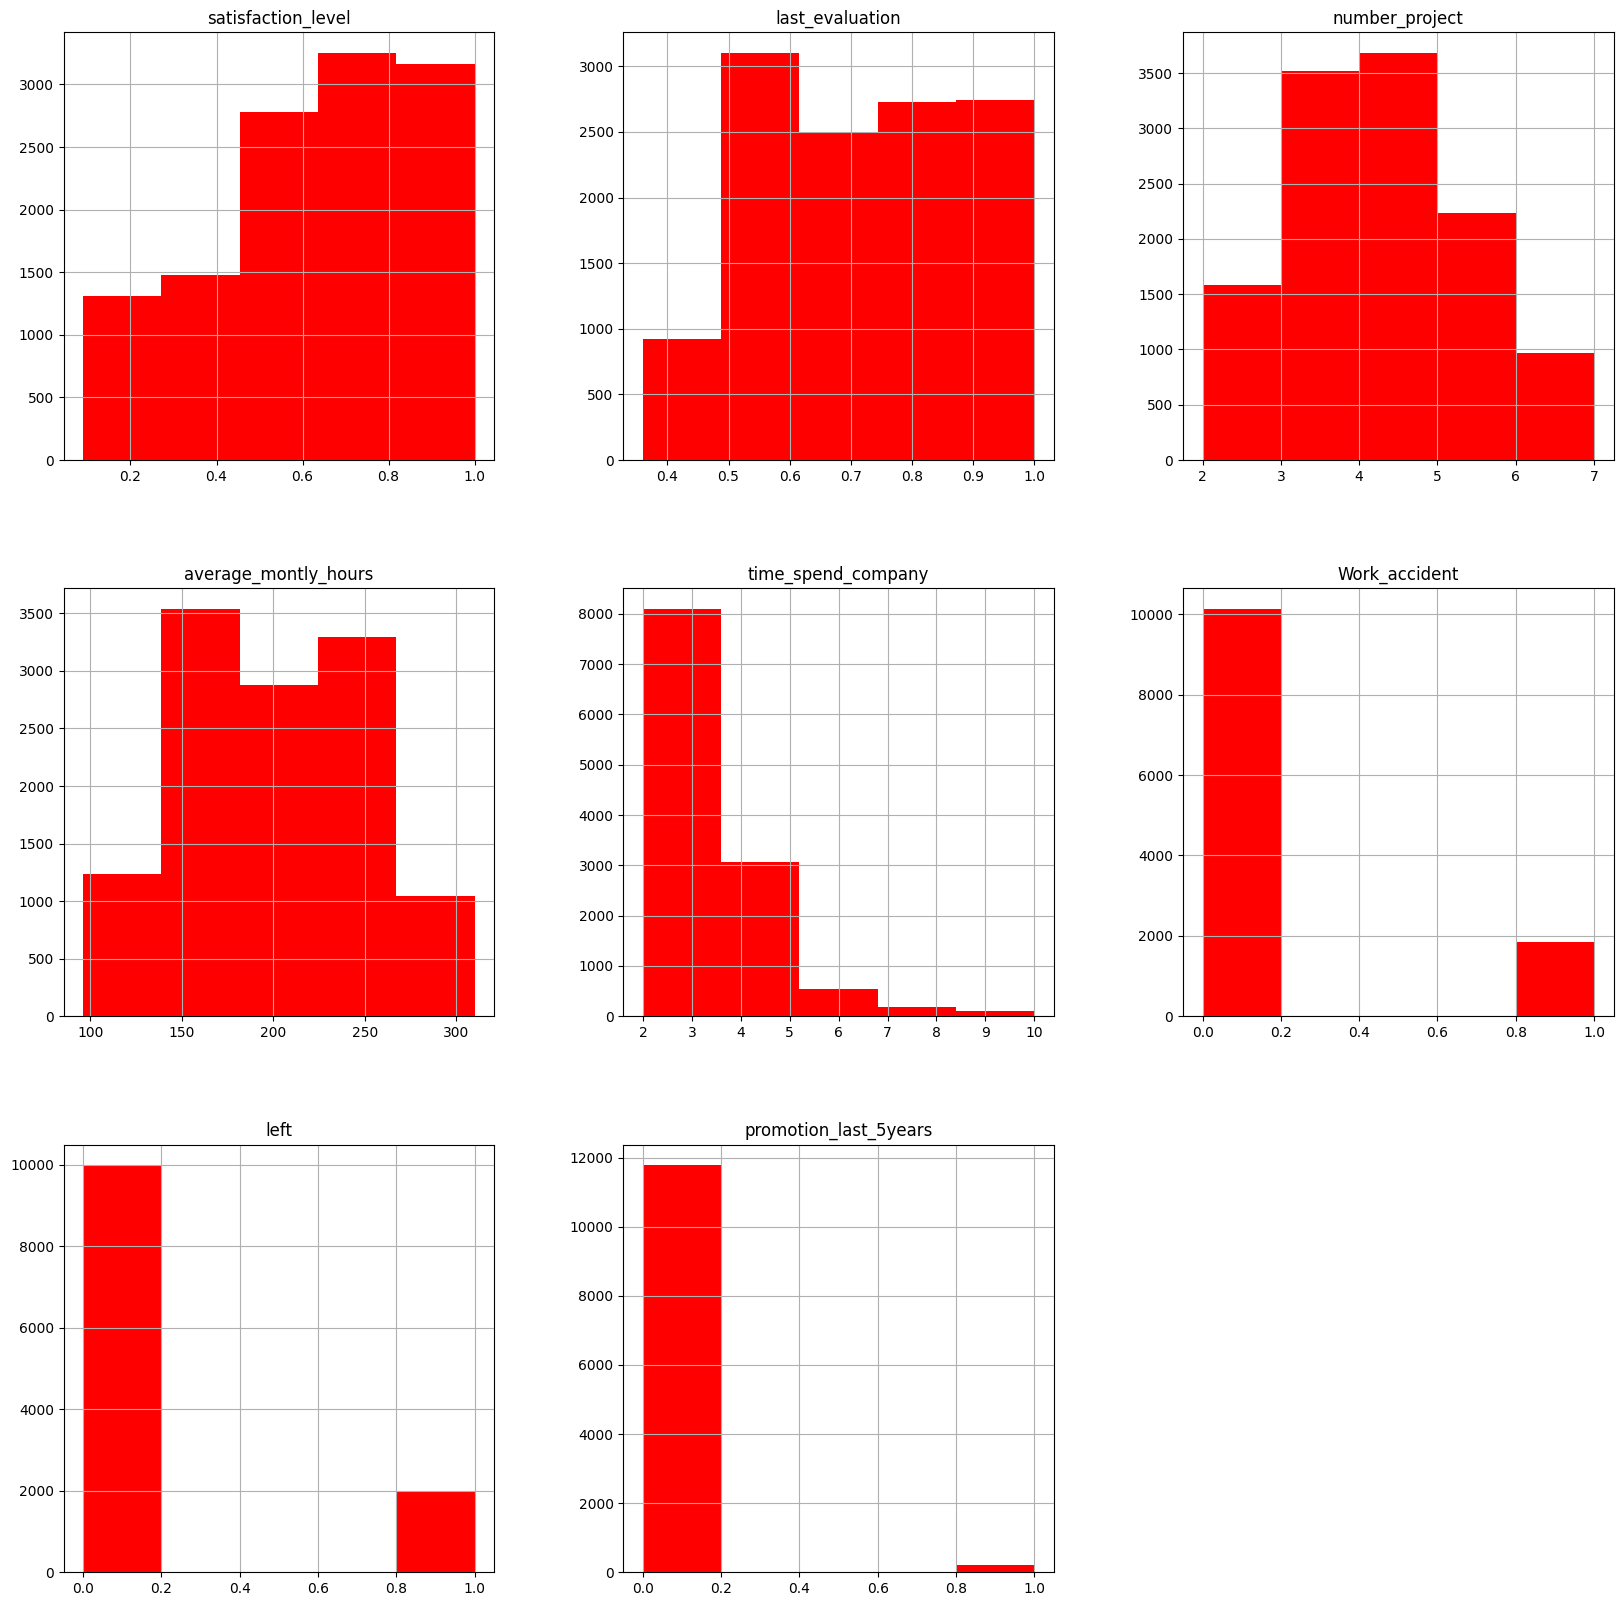

In [28]:
#to plot the histogram of various factors(here columns)
df1.hist(bins=5,figsize=(20,20),color='r')
plt.show()

In [29]:
#we can do the same by using separate histograms

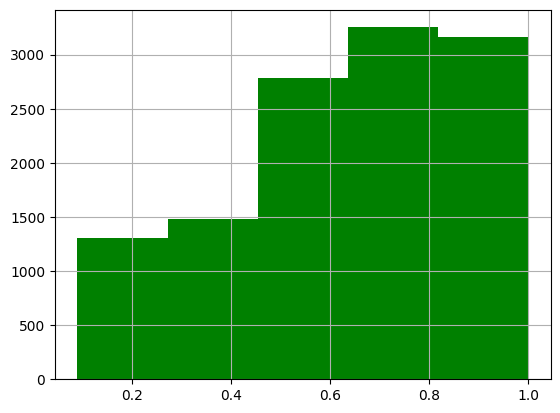

In [30]:
df1['satisfaction_level'].hist(bins=5,color='g')
plt.show()

In [31]:
#similar for rest separately

# ***FEATURE ENGINEERING***

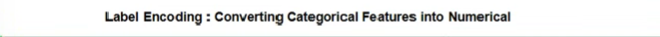

In [32]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [33]:
df1['salary']=le.fit_transform(df1['salary'])
df1['Department']=le.fit_transform(df1['Department'])

<ipython-input-33-789993e3a963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salary']=le.fit_transform(df1['salary'])
<ipython-input-33-789993e3a963>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Department']=le.fit_transform(df1['Department'])


In [34]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [35]:
#we have to separate in the form of x and y, where y is target column i.e. 'left'

In [36]:
x=df1.drop('left',axis='columns')
y=df1['left']

In [37]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,4,0
11996,0.74,0.95,5,266,10,0,1,4,0
11997,0.85,0.54,3,185,10,0,1,4,0
11998,0.33,0.65,3,172,10,0,1,5,0


In [38]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [40]:
x_train.shape

(8393, 9)

***FEATURE SCALING***

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# ***MODEL DEVELOPMENT USING RANDOM FOREST***

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred=rf.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("ACCURACY=",accuracy_score(y_test,y_pred)*100,"%")
print("\n \n ")
cm=confusion_matrix(y_test,y_pred)
print("CONFUSION MATRIX \n",cm)
print("\n \n ")
print("CLASSIFICATION REPORT: \n",classification_report(y_test,y_pred))

ACCURACY= 98.33240689271817 %

 
 
CONFUSION MATRIX 
 [[2986    9]
 [  51  552]]

 
 
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2995
           1       0.98      0.92      0.95       603

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598



***LETS VISUALIZE THE SAME USING HEAT MAP***

<Axes: >

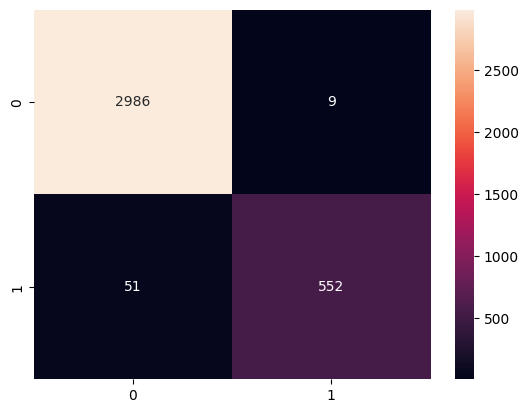

In [45]:
sns.heatmap(cm,annot=True,fmt='d')   #fmt='d' is used for fetting complete values(no.s)

In [46]:
 from sklearn.metrics import precision_score
 precision_score(y_test,y_pred)   #already done in classification report

0.983957219251337

**FEATURE IMPORTANCE METRIX IN RANDOM FOREST/FEATURE EXTRACTION**

In [47]:
score_list=rf.feature_importances_
list_of_features=list(x.columns)
score_df=pd.DataFrame({'features':list_of_features,'score':score_list})
score_df.sort_values(by='score',ascending=False)

,features,score
0,satisfaction_level,0.354132
2,number_project,0.177653
3,average_montly_hours,0.162293
4,time_spend_company,0.159487
1,last_evaluation,0.121844
7,Department,0.012013
8,salary,0.007954
5,Work_accident,0.003883
6,promotion_last_5years,0.000740


<Axes: xlabel='features', ylabel='score'>

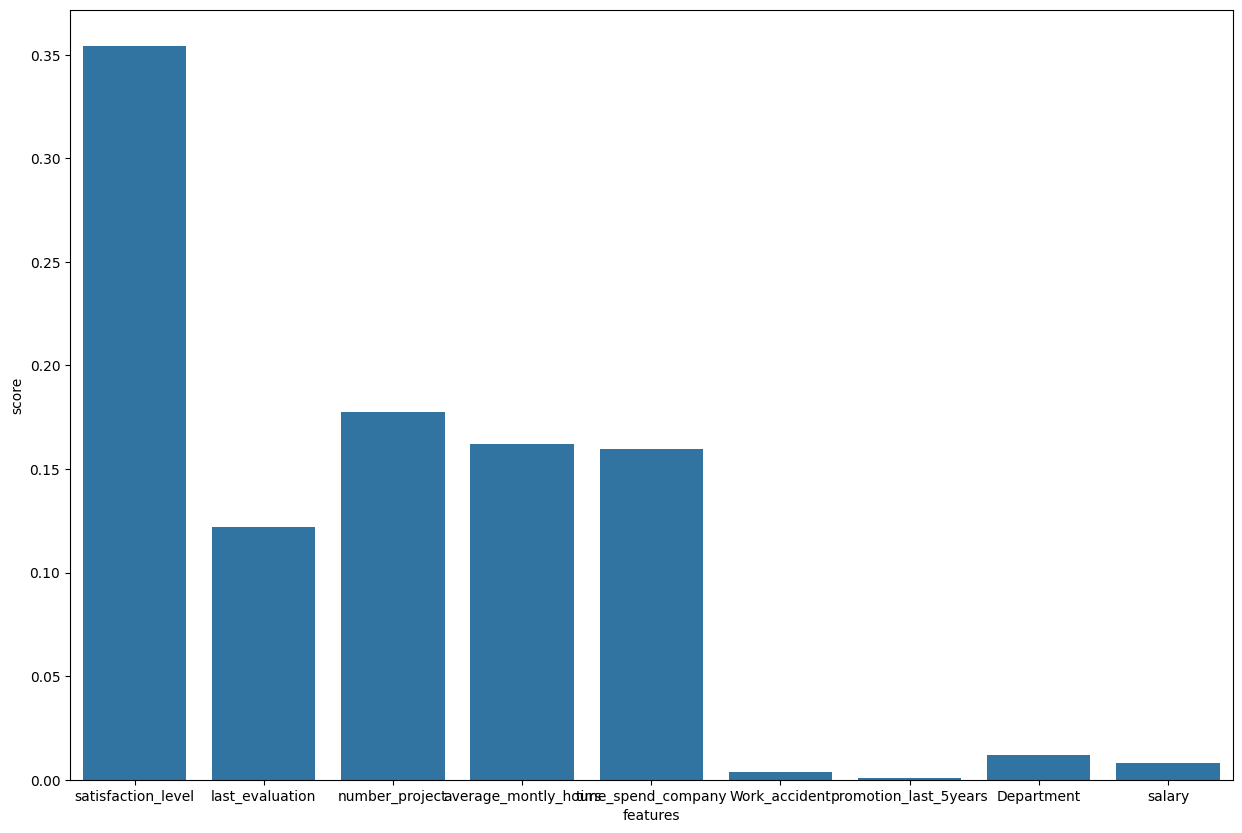

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(x='features',y='score',data=score_df)

***K FOLD CROSS VALIDATION***

In [49]:
#appying e fold cross validation

In [50]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf,x_train,y_train,cv=5)
print("CROSS VALIDATION SCORES=",scores)

CROSS VALIDATION SCORES= [0.98630137 0.983919   0.98451459 0.98510131 0.98808105]


In [51]:
avg_model_score=scores.mean()
print("AVERAGE MODEL SCORE=",avg_model_score)

AVERAGE MODEL SCORE= 0.9855834642477609


# **HYPER PARAMETER TUNING**

In [52]:
#GRID SEARCH CV/RANDOM SEARCH CV

In [53]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [54]:
parameters={'n_estimators':[50,100], 'max_features':['sqrt','log2',None]}

In [55]:
#SEARCH THE BEST PARAMETERS
grid_search=GridSearchCV(estimator=rf,param_grid=parameters)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [56]:
#BEST PARAMETERS
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

***BUILDING MODEL WITH BEST PARAMETERS***

In [57]:
rf2=RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf2.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred2=rf2.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred2)*100

98.30461367426348

In [63]:
#K FOLD CROSS VALIDATION: K=5(USING THE NEW MODEL)

In [64]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf2,x_train,y_train,cv=5)
print("CROSS VALIDATION SCORES=",scores)

CROSS VALIDATION SCORES= [0.98570578 0.983919   0.98451459 0.98569726 0.98808105]


In [65]:
avg_model_score=scores.mean()
print("AVERAGE MODEL SCORE=",avg_model_score)

AVERAGE MODEL SCORE= 0.9855835352361536
